In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import warnings
import scipy
from simulation_data import get
from velocity.velocity_data import get_bulge_ratio
from velocity.velocity_data import get_ellipticity
from velocity.velocity_data import rotational_data
from simulation_data.galaxies import GalaxyPopulation
my_galaxy_population = GalaxyPopulation()
from simulation_data.galaxies.galaxy import age_profile, get_star_formation_history, get_galaxy_particle_data, get_stellar_assembly_data

In [2]:
with h5py.File('galaxy_population_data_'+str(2)+'.hdf5', 'r') as f: 
    ids = f['ids'][:]
    median_age = f['median_age'][:]
    halfmass_radius = f['halfmass_radius'][:]
    total_mass = f['total_mass'][:]
    newbin_current_SFR = f['newbin_current_SFR'][:]
    maximum_merger_ratio_30kpc_current_fraction = f['maximum_merger_ratio_30kpc_current_fraction'][:]
    lam = f['lam'][:]
    bulge_ratio = f['bulge_ratio'][:]

In [3]:
with h5py.File('galaxy_population_data_'+str(2)+'.hdf5', 'a') as f:
    #writing data
    d12 = f.create_dataset('ellipticity', data = get_ellipticity(ids))

D:\moira\TNG work\Pathak_2021\velocity\velocity_data.py:227: ComplexWarning: Casting complex values to real discards the imaginary part
  minor = np.min(np.float32(w))
D:\moira\TNG work\Pathak_2021\velocity\velocity_data.py:228: ComplexWarning: Casting complex values to real discards the imaginary part
  major = np.max(np.float32(w))


0/1045
ID = 0 Ellipticity: 0.2636047601699829
1/1045
ID = 1 Ellipticity: 0.5303816497325897
2/1045
ID = 2 Ellipticity: 0.414648175239563
3/1045
ID = 3 Ellipticity: 0.30651623010635376
4/1045
ID = 4 Ellipticity: 0.7768442779779434
5/1045
ID = 1502 Ellipticity: 0.7089878618717194
6/1045
ID = 1503 Ellipticity: 0.724424809217453
7/1045
ID = 1504 Ellipticity: 0.5432547628879547
8/1045
ID = 1505 Ellipticity: 0.23150098323822021
9/1045
ID = 1507 Ellipticity: 0.2569538950920105
10/1045
ID = 1510 Ellipticity: 0.34738582372665405
11/1045
ID = 2966 Ellipticity: 0.7403786480426788
12/1045
ID = 2967 Ellipticity: 0.24512720108032227
13/1045
ID = 2968 Ellipticity: 0.6914420425891876
14/1045
ID = 2969 Ellipticity: 0.7112255394458771
15/1045
ID = 2970 Ellipticity: 0.22529393434524536
16/1045
ID = 2971 Ellipticity: 0.3569604158401489
17/1045
ID = 2972 Ellipticity: 0.6383244097232819
18/1045
ID = 2973 Ellipticity: 0.4242410659790039
19/1045
ID = 2974 Ellipticity: 0.8682638257741928
20/1045
ID = 2975 Elli

D:\moira\TNG work\Pathak_2021\velocity\velocity_data.py:207: RuntimeWarning: divide by zero encountered in true_divide
  e_v = v_phi/new_v_circ


1031/1045
ID = 167843 Ellipticity: 0.3097231388092041
1032/1045
ID = 168489 Ellipticity: 0.6862710118293762
1033/1045
ID = 169434 Ellipticity: 0.6152192056179047
1034/1045
ID = 169576 Ellipticity: 0.4403924345970154
1035/1045
ID = 170370 Ellipticity: 0.17150938510894775
1036/1045
ID = 171550 Ellipticity: 0.7384495139122009
1037/1045
ID = 172902 Ellipticity: 0.5113096535205841
1038/1045
ID = 176315 Ellipticity: 0.7387921810150146
1039/1045
ID = 179517 Ellipticity: 0.2732071280479431
1040/1045
ID = 180545 Ellipticity: 0.7745692133903503
1041/1045
ID = 181618 Ellipticity: 0.5123303532600403
1042/1045
ID = 184169 Ellipticity: 0.07417166233062744
1043/1045
ID = 186241 Ellipticity: 0.11178332567214966
1044/1045
ID = 195414 Ellipticity: 0.43021899461746216


## warnings.filterwarnings('ignore')

PSB_selection = (median_age<=1.2)&(np.log10(newbin_current_SFR/10**(total_mass))<=-10.5)
intermediate_quiescent_selection = (median_age>1.2)&(median_age<=1.5)&(np.log10(newbin_current_SFR/10**(total_mass))<=-10.5)
old_quiescent_selection = (median_age>1.5)&(np.log10(newbin_current_SFR/10**(total_mass))<=-10.5)
starforming_selection = (np.log10(newbin_current_SFR/10**(total_mass))>-10.5)

lambda vs epsilon

In [11]:
i_list = [0,2,6]
lam_plt = []
eps_plt = []

[False False False ... False False False]


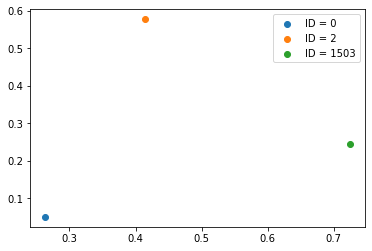

In [9]:
for i in i_list:
    id = ids[i]
    pos,vel_raw,star_masses,cor_pos = star_pos_vel(id)
    r, vel_circ, v_r, r_v_r, lam, bins, mass_num, vel, radius, v_phi,lambda_obs = rotational_data(id,'')
    cov  = np.cov(cor_pos.T)
    w, v = la.eig(cov)
    minor = np.min(np.float32(w))
    major = np.max(np.float32(w))
    ellipticity = 1.0-minor/major
    plt.scatter(ellipticity,lambda_obs, label = "ID = " + str(id))
    plt.legend()
    lam_plt.append(lam)
    eps_plt.append(ellipticity)

<KeysViewHDF5 []>
